# EDA

Relationship date and Value

In [15]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter


In [2]:
# Right after importing seaborn (could also use 'whitegrid')
sns.set_theme(style='whitegrid', context='talk')
pd.options.display.float_format = '{:.2f}'.format

In [3]:
data = pd.read_csv('data/data_full_clean.csv', index_col = 0)
# set period to datetime
data['Period'] = pd.to_datetime(data['Period'])

In [4]:
data

,Period,Commodity,Province,Country,State,Value_$,Quantity_kg,Unit of measure
0,2017-05-01,"1605.30.10 - lobster, prepared or preserved, f...",Newfoundland and Labrador,United States,Massachusetts,2454203,42059,Weight in kilograms
1,2018-06-01,"1605.30.10 - lobster, prepared or preserved, f...",Newfoundland and Labrador,United States,Massachusetts,2199419,48158,Weight in kilograms
2,2014-06-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Newfoundland and Labrador,United States,Massachusetts,1299983,38486,Weight in kilograms
3,2014-10-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Newfoundland and Labrador,United States,Massachusetts,151542,3475,Weight in kilograms
4,2014-11-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Newfoundland and Labrador,United States,Massachusetts,634072,22628,Weight in kilograms
...,...,...,...,...,...,...,...,...
57380,2006-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Northwest Territories,Hong Kong,NaN,6000,273,Weight in kilograms
57381,2007-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Northwest Territories,Japan,NaN,7200,408,Weight in kilograms
57382,2007-03-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Northwest Territories,"Korea, South",NaN,10080,572,Weight in kilograms
57383,2006-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Nunavut,Czechia,NaN,3000,136,Weight in kilograms


In [5]:
data.dtypes

Period             datetime64[ns]
Commodity                  object
Province                   object
Country                    object
State                      object
Value_$                     int64
Quantity_kg                 int64
Unit of measure            object
dtype: object

In [6]:
data[data['Period'].dt.year > 2000]

,Period,Commodity,Province,Country,State,Value_$,Quantity_kg,Unit of measure
0,2017-05-01,"1605.30.10 - lobster, prepared or preserved, f...",Newfoundland and Labrador,United States,Massachusetts,2454203,42059,Weight in kilograms
1,2018-06-01,"1605.30.10 - lobster, prepared or preserved, f...",Newfoundland and Labrador,United States,Massachusetts,2199419,48158,Weight in kilograms
2,2014-06-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Newfoundland and Labrador,United States,Massachusetts,1299983,38486,Weight in kilograms
3,2014-10-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Newfoundland and Labrador,United States,Massachusetts,151542,3475,Weight in kilograms
4,2014-11-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Newfoundland and Labrador,United States,Massachusetts,634072,22628,Weight in kilograms
...,...,...,...,...,...,...,...,...
57380,2006-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Northwest Territories,Hong Kong,NaN,6000,273,Weight in kilograms
57381,2007-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Northwest Territories,Japan,NaN,7200,408,Weight in kilograms
57382,2007-03-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Northwest Territories,"Korea, South",NaN,10080,572,Weight in kilograms
57383,2006-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Nunavut,Czechia,NaN,3000,136,Weight in kilograms


In [7]:
data.dtypes

Period             datetime64[ns]
Commodity                  object
Province                   object
Country                    object
State                      object
Value_$                     int64
Quantity_kg                 int64
Unit of measure            object
dtype: object

In [8]:
x_values = data.loc[data['Period'].dt.year > 2010,'Period']
type(x_values)

pandas.core.series.Series

(array([14610., 15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(14610.0, 0, '2010-01-01'),
  Text(15340.0, 0, '2012-01-01'),
  Text(16071.0, 0, '2014-01-01'),
  Text(16801.0, 0, '2016-01-01'),
  Text(17532.0, 0, '2018-01-01'),
  Text(18262.0, 0, '2020-01-01'),
  Text(18993.0, 0, '2022-01-01'),
  Text(19723.0, 0, '2024-01-01')])

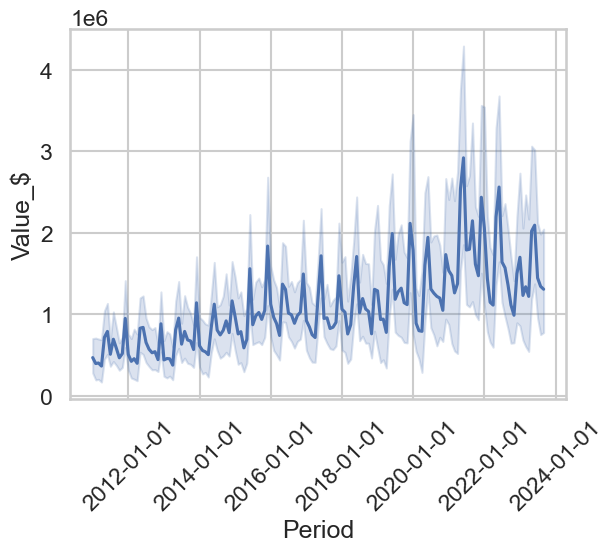

In [9]:
ax = sns.lineplot(data = data, x=x_values, y=data['Value_$'])

# Format the x-axis labels as dates
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

(array([14610., 15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(14610.0, 0, '2010-01-01'),
  Text(15340.0, 0, '2012-01-01'),
  Text(16071.0, 0, '2014-01-01'),
  Text(16801.0, 0, '2016-01-01'),
  Text(17532.0, 0, '2018-01-01'),
  Text(18262.0, 0, '2020-01-01'),
  Text(18993.0, 0, '2022-01-01'),
  Text(19723.0, 0, '2024-01-01')])

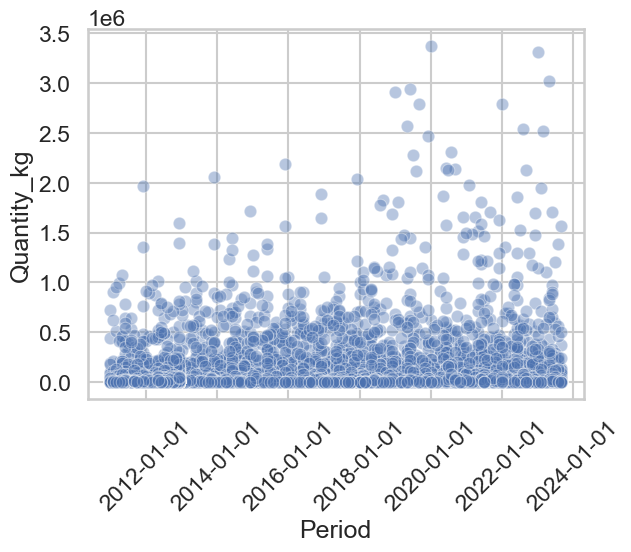

In [17]:
ax = sns.scatterplot(data = data, x=x_values, y=data['Quantity_kg'], alpha=0.4)

# Format the x-axis labels as dates
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

In [35]:
data

,Period,Commodity,Province,Country,State,Value_$,Quantity_kg,Unit of measure
0,2017-05-01,"1605.30.10 - lobster, prepared or preserved, f...",Newfoundland and Labrador,United States,Massachusetts,2454203,42059,Weight in kilograms
1,2018-06-01,"1605.30.10 - lobster, prepared or preserved, f...",Newfoundland and Labrador,United States,Massachusetts,2199419,48158,Weight in kilograms
2,2014-06-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Newfoundland and Labrador,United States,Massachusetts,1299983,38486,Weight in kilograms
3,2014-10-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Newfoundland and Labrador,United States,Massachusetts,151542,3475,Weight in kilograms
4,2014-11-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Newfoundland and Labrador,United States,Massachusetts,634072,22628,Weight in kilograms
...,...,...,...,...,...,...,...,...
57380,2006-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Northwest Territories,Hong Kong,NaN,6000,273,Weight in kilograms
57381,2007-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Northwest Territories,Japan,NaN,7200,408,Weight in kilograms
57382,2007-03-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Northwest Territories,"Korea, South",NaN,10080,572,Weight in kilograms
57383,2006-02-01,"0306.22.10 - lobsters, (homarus spp), live (te...",Nunavut,Czechia,NaN,3000,136,Weight in kilograms


In [97]:
annual_data = data.drop(columns = ['Province', 'Country', 'State', 'Unit of measure'])
annual_data['Year'] = data['Period'].dt.year
annual_data = annual_data.groupby(['Commodity', 'Year'], as_index=False).agg({'Value_$': 'sum', 'Quantity_kg': 'sum'}).reset_index(drop=True)

# annual_data = annual_data.sort_values('Value_$', ascending = False).reset_index(drop=True)
annual_data

,Commodity,Year,Value_$,Quantity_kg
0,"0306.11.00 - rock lobster & o sea crawfish,frz...",2012,2149954,197718
1,"0306.11.00 - rock lobster & o sea crawfish,frz...",2013,1697035,136571
2,"0306.11.00 - rock lobster & o sea crawfish,frz...",2014,3448411,267140
3,"0306.11.00 - rock lobster & o sea crawfish,frz...",2015,6291135,401061
4,"0306.11.00 - rock lobster & o sea crawfish,frz...",2016,1959146,91588
...,...,...,...,...
354,"1605.30.99 - lobster, prepared or preserved, o...",2012,3821464,764314
355,"1605.30.99 - lobster, prepared or preserved, o...",2013,3728414,698505
356,"1605.30.99 - lobster, prepared or preserved, o...",2014,3916409,747611
357,"1605.30.99 - lobster, prepared or preserved, o...",2015,8495287,932522


In [98]:
annual_data.dtypes

Commodity      object
Year            int32
Value_$         int64
Quantity_kg     int64
dtype: object

In [116]:
annual_data_22 = annual_data.copy()

In [194]:
def top_commodities_annual(df_name, year):
    annual_data = df_name.drop(columns = ['Province', 'Country', 'State', 'Unit of measure'])
    annual_data['Year'] = annual_data['Period'].dt.year
    annual_data = annual_data.groupby(['Year', 'Commodity'], as_index=False).agg({'Value_$': 'sum', 'Quantity_kg': 'sum'}).reset_index(drop=True)
    annual_data = annual_data[annual_data['Year'] == year].reset_index(drop = True)
    # annual total for that year to divide each commodity by 
    annual_total = data.loc[data['Period'].dt.year == year,'Value_$'].sum()
    # print('annual_total - year: ', year, '\namount:', annual_total)
    annual_data['Value_percent'] = annual_data['Value_$']/annual_total
    annual_data.sort_values(by=['Value_$', 'Year'], ascending = False, inplace=True)
    return annual_data
    



In [202]:
a = top_commodities_annual(data, 2020)[['Commodity','Value_percent']]
a

,Commodity,Value_percent
4,"0306.32.10 - lobsters, live",0.47
2,"0306.12.90 - lobsters, nes, frozen",0.33
9,"1605.30.10 - lobster, prepared or preserved, f...",0.14
1,"0306.12.10 - lobsters, in brine, frozen",0.05
11,"1605.30.90 - lobster, prepared or preserved, nes",0.01
5,"0306.32.90 - lobsters, fresh or chilled, o/t live",0.00
10,"1605.30.20 - lobster, prepared or preserved, i...",0.00
8,"0306.92.00 - lobsters, nes, dried/salted/in br...",0.00
7,0306.91.00 - rock lobster & other sea crawfish...,0.00
3,0306.31.00 - rock lobster and other sea crawfi...,0.00


In [204]:
b = top_commodities_annual(data, 2021)[['Commodity','Value_percent']]
b

,Commodity,Value_percent
4,"0306.32.10 - lobsters, live",0.38
2,"0306.12.90 - lobsters, nes, frozen",0.36
7,"1605.30.10 - lobster, prepared or preserved, f...",0.20
1,"0306.12.10 - lobsters, in brine, frozen",0.05
9,"1605.30.90 - lobster, prepared or preserved, nes",0.00
8,"1605.30.20 - lobster, prepared or preserved, i...",0.00
5,"0306.32.90 - lobsters, fresh or chilled, o/t live",0.00
3,0306.31.00 - rock lobster and other sea crawfi...,0.00
0,"0306.11.00 - rock lobster & o sea crawfish,frz...",0.00
6,"0306.92.00 - lobsters, nes, dried/salted/in br...",0.00


In [238]:
merged_df = pd.merge(a, b, on='Commodity')
merged_df

,Commodity,Value_percent_x,Value_percent_y
0,"0306.32.10 - lobsters, live",0.47,0.38
1,"0306.12.90 - lobsters, nes, frozen",0.33,0.36
2,"1605.30.10 - lobster, prepared or preserved, f...",0.14,0.20
3,"0306.12.10 - lobsters, in brine, frozen",0.05,0.05
4,"1605.30.90 - lobster, prepared or preserved, nes",0.01,0.00
5,"0306.32.90 - lobsters, fresh or chilled, o/t live",0.00,0.00
6,"1605.30.20 - lobster, prepared or preserved, i...",0.00,0.00
7,"0306.92.00 - lobsters, nes, dried/salted/in br...",0.00,0.00
8,0306.31.00 - rock lobster and other sea crawfi...,0.00,0.00
9,"0306.11.00 - rock lobster & o sea crawfish,frz...",0.00,0.00


In [244]:
# get list of years from DF:
years_list =  list(set(data['Period'].dt.year.unique()))
years_list[:3]

[1988, 1989, 1990]

In [277]:
commoditites_list = data['Commodity'].unique()
len(commoditites_list)

31

In [274]:
len(years_list)

36

In [278]:
merged_df = pd.DataFrame(columns = ['Commodity'],data = commoditites_list)
# merged_df = pd.DataFrame()
for year in years_list[:25]:
    # print(year)
    year_df = top_commodities_annual(data, year)[['Commodity','Value_percent']]
    year_df.rename(columns = {'Value_percent': year}, inplace = True)
    # print(year_df)
    # join merged df and percents based on commodity balue 
    merged_df = pd.merge(merged_df, year_df, on = 'Commodity', how='outer')
    # print(merged_df)
merged_df

,Commodity,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,"1605.30.10 - lobster, prepared or preserved, f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1605.30.11 - lobster meat, frozen, cooked by s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.18
2,"1605.30.99 - lobster, prepared or preserved, o...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,"1605.30.90 - lobster, prepared or preserved, nes",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1605.30.19 - lobster meat, o/t frozen, cooked ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01
5,"1605.30.20 - lobster, prepared or preserved, i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"1605.30.91 - lobster, prepared or preserved, i...",0.05,0.00,0.00,0.04,0.02,0.02,0.01,0.03,0.02,...,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00
7,"1605.30.11 - lobster meat, frozen, simply boil...",0.14,0.24,0.04,0.12,0.15,0.12,0.14,0.12,0.12,...,0.14,0.16,0.17,0.16,0.12,0.16,0.13,0.16,0.16,NaN
8,"1605.30.19 - lobster meat, not frozen, simply ...",NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.01,NaN
9,"1605.30.99 - lobster, prepared or preserved, n...",NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,NaN


In [25]:
import plotly.express as px

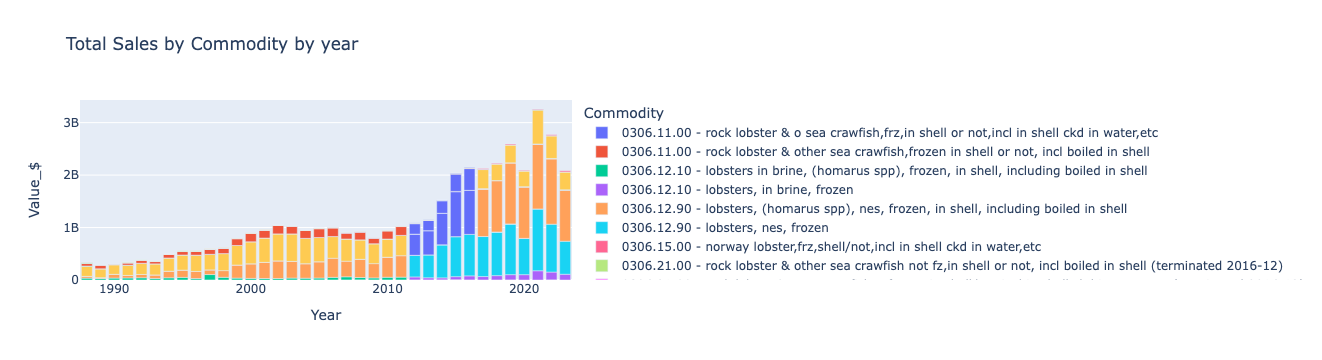

In [65]:
import plotly.express as px


fig = px.bar(annual_data, x="Year", y="Value_$", color='Commodity', title="Total Sales by Commodity by year")
fig.show()

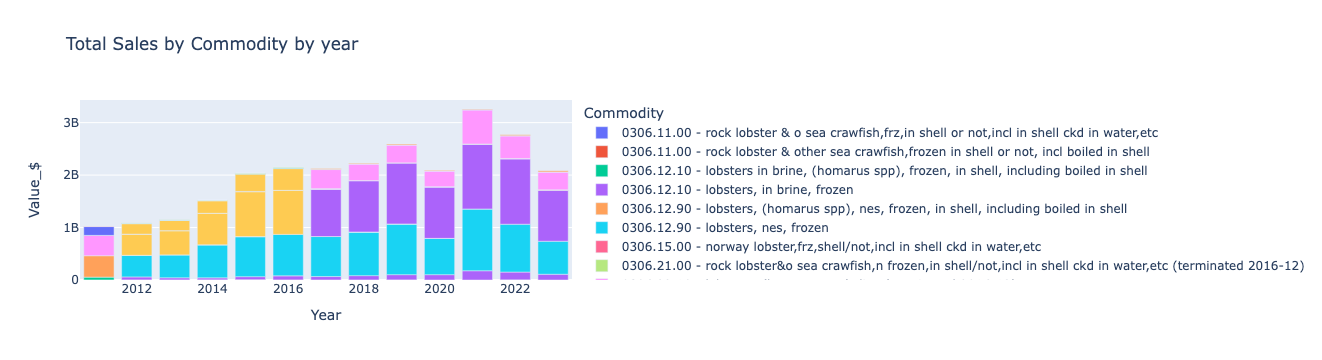

In [71]:
fig = px.bar(annual_data[annual_data['Year'] > 2010], x="Year", y="Value_$", color='Commodity', title="Total Sales by Commodity by year")
fig.show()